In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding='latin1')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3317,ham,I'm freezing and craving ice. Fml,NaN,NaN,NaN
3518,ham,Hanging out with my brother and his family,NaN,NaN,NaN
5047,ham,Yeah so basically any time next week you can g...,NaN,NaN,NaN
2960,ham,I'm doing da intro covers energy trends n pros...,NaN,NaN,NaN
3379,ham,Just finished. Missing you plenty,NaN,NaN,NaN
535,ham,"Good afternoon, my love! How goes that day ? I...",NaN,NaN,NaN
1074,ham,Aight ill get on fb in a couple minutes,NaN,NaN,NaN
1545,ham,"Good afternoon, my love ! Any job prospects ? ...",NaN,NaN,NaN
391,ham,Hey so this sat are we going for the intro pil...,NaN,NaN,NaN
3701,ham,Hey loverboy! I love you !! I had to tell ... ...,NaN,NaN,NaN


## 1. RAW DATA PROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:

df.rename(columns={'v1':'Category','v2':'Text'},inplace=True)
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
# Encoding
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()

df['Category'] = en.fit_transform(df['Category'])
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Missing and duplicate values

df.isnull().sum()

Category    0
Text        0
dtype: int64

In [9]:
# Checking for Duplicate values

print("Before: ",df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print("After: ",df.duplicated().sum())

Before:  403
After:  0


## 2. EDA

In [10]:
df.Category.value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

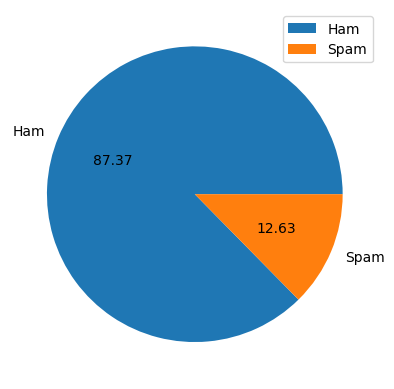

In [11]:
import matplotlib.pyplot as plt

plt.pie(df.Category.value_counts(), labels=('Ham','Spam'),autopct="%0.2f")
plt.legend()
plt.show()

# Inference : Data is imbalance

In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
# Number of cahracters in text
df['Char_count'] = df['Text'].apply(len)
df['Char_count']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Char_count, Length: 5169, dtype: int64

In [14]:
# Number of words in text
df['Word_count'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['Word_count']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Word_count, Length: 5169, dtype: int64

In [15]:
# Number of sentences
df['Sentence_count'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df.head()

,Category,Text,Char_count,Word_count,Sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df[['Text','Char_count','Word_count','Sentence_count']].describe()

,Char_count,Word_count,Sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
# Ham
df[df['Category'] == 0][['Text','Char_count','Word_count','Sentence_count']].describe()

,Char_count,Word_count,Sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# Spam
df[df['Category'] == 1][['Char_count','Word_count','Sentence_count']].describe()

,Char_count,Word_count,Sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [20]:
import seaborn as sns

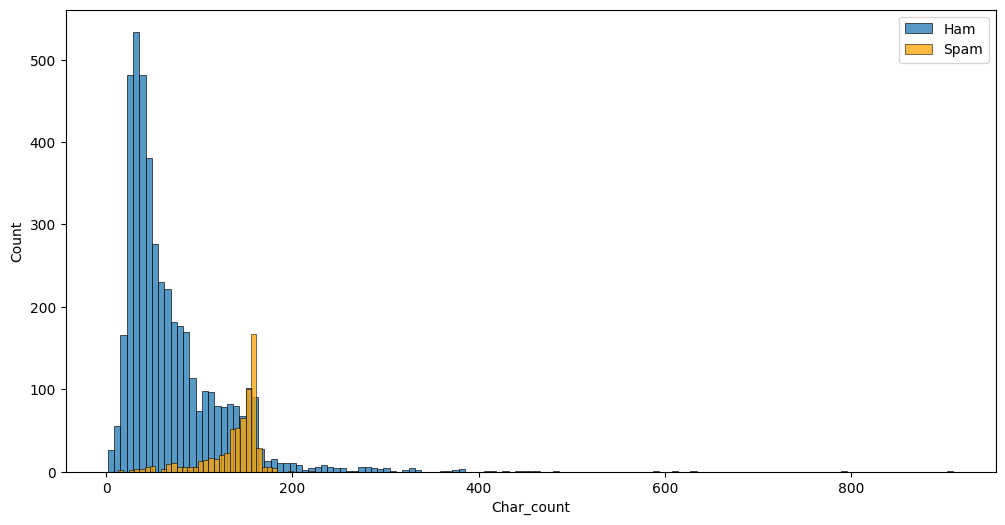

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['Char_count'])
sns.histplot(df[df['Category']==1]['Char_count'], color='orange')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

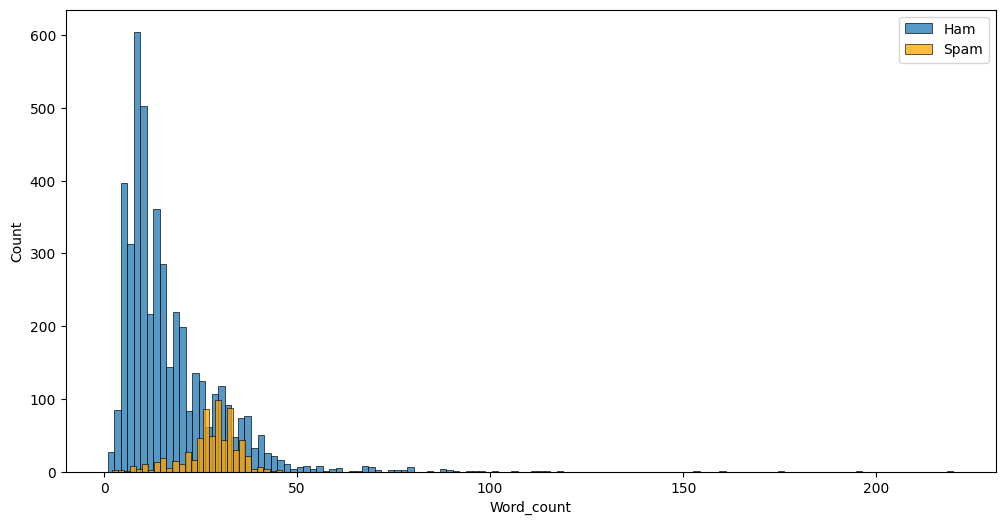

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==0]['Word_count'])
sns.histplot(df[df['Category']==1]['Word_count'], color='orange')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

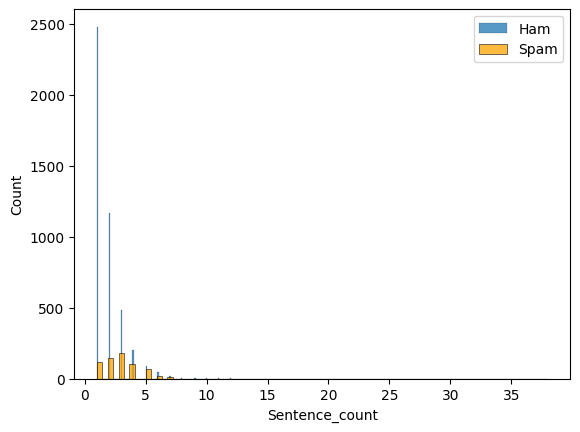

In [23]:
plt.figure()
sns.histplot(df[df['Category']==0]['Sentence_count'])
sns.histplot(df[df['Category']==1]['Sentence_count'], color='orange')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

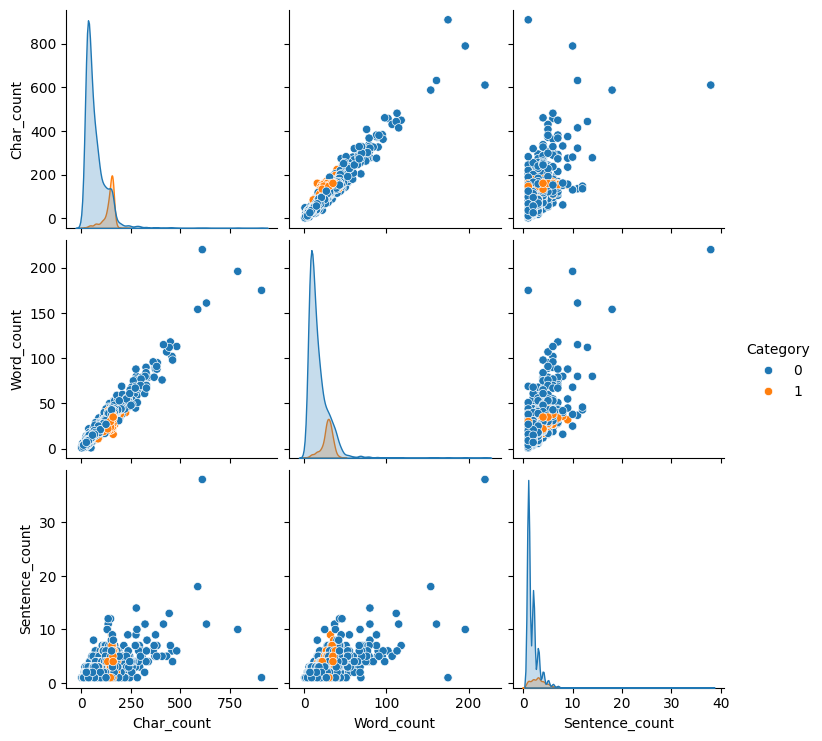

In [24]:
sns.pairplot(df,hue='Category')

<Axes: >

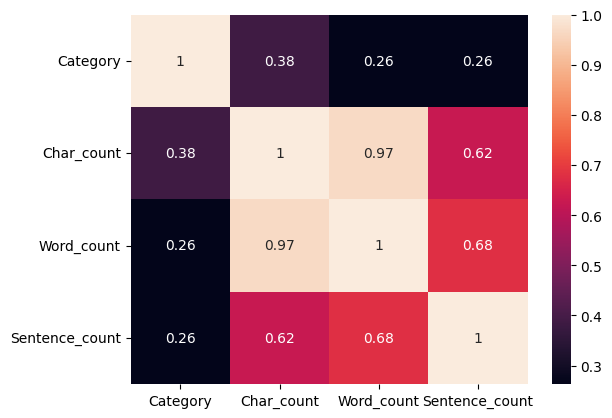

In [25]:
sns.heatmap(df[['Category','Char_count','Word_count','Sentence_count']].corr(),annot=True)

# After analysing heatmap, we find that char_count, word_count and sentence_count are in correlation.
# So, we will choose anyone of them. Since, char_count has high correlation with Category (target/label) than the other two, we will choose char_count.

## 3. DATA PREPROCESSING

1. Low case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming

In [26]:
# import nltk
# nltk.download('stopwords')

In [27]:
# Stop words: words that don't contribute in the meaning of the sentence.
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
# Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### STEMMING
Stemming is a text normalization technique in Natural Language Processing (NLP) that reduces words to their root or base form, called a "stem". This process involves removing prefixes and suffixes from words to standardize them. For example, the words "running," "runner," and "runs" would all be stemmed to "run". Stemming is crucial for various NLP tasks like information retrieval, text mining, and sentiment analysis. 

#### How Stemming Works:
Stemming algorithms use rules to chop off the ends of words, aiming to reduce them to their core meaning. These rules are often specific to suffixes and prefixes, but stemming algorithms don't always produce actual words. For example, the stem of "tradition" might be "tradi," which isn't a valid word. 
#### Key Aspects of Stemming:
1. Reduces Dimensionality: By converting different word forms into a single stem, stemming reduces the number of unique words in a text, which can simplify analysis and improve efficiency. 
2. Text Normalization: Stemming is a form of text normalization, which is essential for many NLP tasks. 
#### Not Always Accurate:
Stemming can sometimes result in stems that are not actual words or can lead to over-stemming (stripping too much of a word) or under-stemming (not stripping enough). 
#### Examples of Stemming:
"eating", "eats", "eaten" -> "eat"
"running", "runner", "runs" -> "run"
"chocolates" -> "chocolate"
"retrieval" -> "retrieve" 
#### Stemming Algorithms:
Several stemming algorithms exist, with the Porter stemmer being one of the most popular. The Snowball stemmer is another, which is an improved version of the Porter stemmer and supports multiple languages. 
#### Limitations of Stemming:
1. Accuracy: The stemming process can sometimes produce stems that are not actual words, leading to less accurate results. 
2. Over-stemming/Under-stemming: As mentioned earlier, stemming can sometimes over-reduce words or not reduce them enough. 
#### Lemmatization vs. Stemming:
Lemmatization, another NLP technique, also aims to reduce words to their root form, but it uses a dictionary and morphological analysis to produce a valid word (lemma). Stemming is generally faster and less computationally expensive than lemmatization, but lemmatization is often more accurate because it takes into account the context of the word. 

<img src="StemmingVSLemmatization.avif" width="80%">

In [29]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('Running')

'run'

In [30]:
# Text transforming function


stopword_list = stopwords.words('english')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    t = []
    for i in text:
        if i.isalnum() & (i not in stopword_list):
            t.append(ps.stem(i))

    return " ".join(t)

In [31]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [32]:
df['Transformed_text'] = df['Text'].apply(transform_text)
df.head()

,Category,Text,Char_count,Word_count,Sentence_count,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

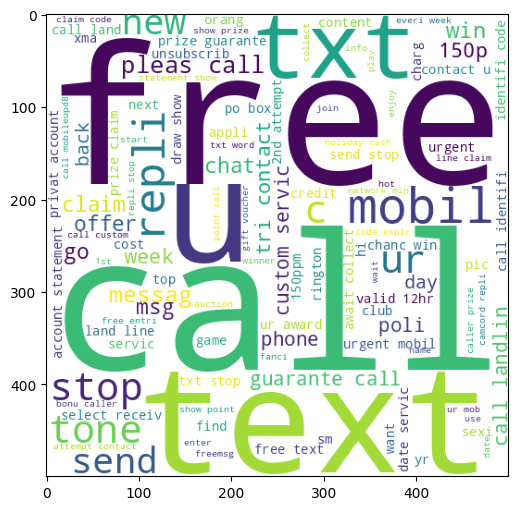

In [34]:
spam_wc = wc.generate(df[df['Category']==1]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)


In [35]:
# type(df[df['Category']==0]['Transformed_text'].str.cat(sep=" "))

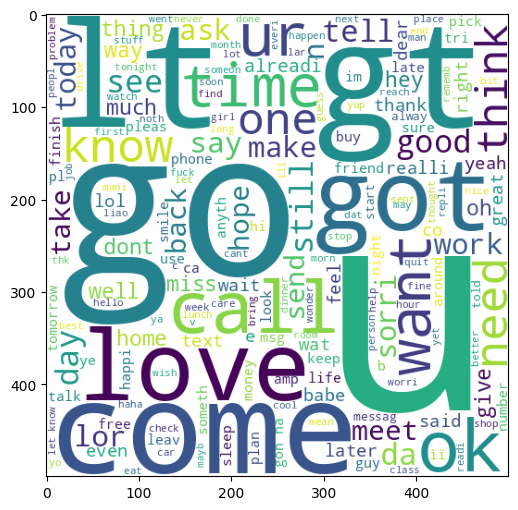

In [36]:
ham_wc = wc.generate(df[df['Category']==0]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.imshow(ham_wc)


In [37]:
spam_corpus = []
for msg in df[df['Category'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

C:\Users\user\AppData\Local\Temp\ipykernel_9348\2361032754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='hls')


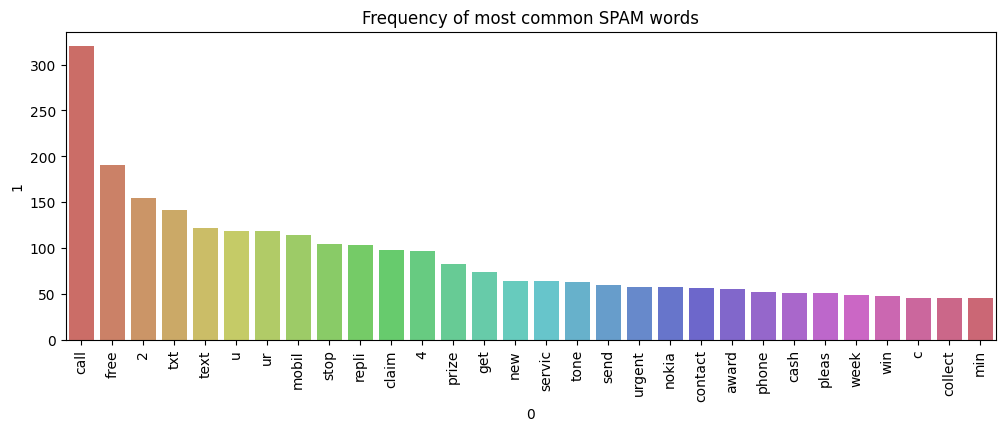

In [38]:
from collections import Counter

plt.figure(figsize=(12,4))
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='hls')
plt.xticks(rotation='vertical')
plt.title("Frequency of most common SPAM words")
plt.show()

## 4. MODEL BUILDING

1. Vectorization (Using Bag of Words, Tfidf, Word2Vac)
2. Choosing best model by analysing Precision & Accuracy of Various Models

### VECTORIZATION
Vectorization in machine learning refers to the process of converting raw data, such as text, images, or other non-numerical formats, into numerical vectors. This transformation is crucial because machine learning algorithms operate on numerical data. 
#### Key aspects of vectorization in ML:
1. Enabling ML algorithms
2. Feature extraction
3. Efficiency and performance
#### Examples of vectorization in different domains:
1. Natural Language Processing (NLP):
    - Bag-of-Words (BoW): Represents text as a vector where each dimension corresponds to a unique word in the vocabulary, and the value represents its frequency in a document.
    - TF-IDF (Term Frequency-Inverse Document Frequency): Similar to BoW but also considers the importance of a word across the entire corpus.
    - Word Embeddings (e.g., Word2Vec, GloVe, FastText): Represent words as dense vectors in a continuous vector space, capturing semantic relationships between words.
    - Contextual Embeddings (e.g., BERT, GPT): Generate word embeddings that consider the surrounding context of a word in a sentence.
2. Image Processing:
    Images are typically converted into numerical arrays (pixels values) that can be processed by convolutional neural networks (CNNs) or other image processing algorithms.
3. Categorical Data:
    Categorical features (e.g., "color": "red", "blue") are often converted into numerical representations using techniques like one-hot encoding or label encoding. 
    
In essence, vectorization is a fundamental step that bridges the gap between raw, human-interpretable data and the numerical format required for machine learning algorithms to learn and make predictions.

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [93]:
# x = cv.fit_transform(df['Transformed_text']).toarray()
x = tfidf.fit_transform(df['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [94]:
y = df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(x_train, y_train)
pred1 = gnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred1))
print("Precision: ", precision_score(y_test, pred1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred1))

Accuracy:  0.874274661508704
Precision:  0.5181818181818182

Confusion Matrix: 
 [[790 106]
 [ 24 114]]


In [99]:
mnb.fit(x_train, y_train)
pred2 = mnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred2))
print("Precision: ", precision_score(y_test, pred2))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred2))

Accuracy:  0.9709864603481625
Precision:  1.0

Confusion Matrix: 
 [[896   0]
 [ 30 108]]


In [77]:
bnb.fit(x_train, y_train)
pred3 = bnb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred3))
print("Precision: ", precision_score(y_test, pred3))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, pred3))

Accuracy:  0.9835589941972921
Precision:  0.991869918699187

Confusion Matrix: 
 [[895   1]
 [ 16 122]]


In [78]:
# Analysing some more models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [80]:
clf = {
    'SVC': svc,
    'KNeighbors': knc,
    'MultinomialNB': mnb,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'Bagging': bc,              # Comment it out bcoz it takes more than 13 min to fit.
    'ExtraTrees': etc,
    'GradientBoosting': gbc,
    'XGBoost': xgb
}


In [81]:
Accuracy = []
Precision = []
for name,model in clf.items():
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    Accuracy.append(accuracy_score(y_test, pred))
    Precision.append(precision_score(y_test, pred))

    print("Model : ",name)
    print("Accuracy: ", Accuracy[-1])
    print("Precision: ", Precision[-1])
    print()


Model :  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

Model :  KNeighbors
Accuracy:  0.9052224371373307
Precision:  1.0

Model :  MultinomialNB
Accuracy:  0.9709864603481625
Precision:  1.0

Model :  DecisionTree
Accuracy:  0.9332688588007737
Precision:  0.8415841584158416

Model :  LogisticRegression
Accuracy:  0.9555125725338491
Precision:  0.96

Model :  RandomForest
Accuracy:  0.9738878143133463
Precision:  0.9826086956521739

Model :  AdaBoost
Accuracy:  0.9216634429400387
Precision:  0.8202247191011236

Model :  Bagging
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659

Model :  ExtraTrees
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406

Model :  GradientBoosting
Accuracy:  0.9506769825918762
Precision:  0.9306930693069307

Model :  XGBoost
Accuracy:  0.9680851063829787
Precision:  0.9487179487179487



In [ ]:
# Models_df.sort_values(by='Precision',ascending=False)       # Models_df without max_iteration = 3000 in tfidf Vectorizer

# Output
# 	Model	            Accuracy	Precision
# 1	KNeighbors	        0.900387	1.000000
# 2	MultinomialNB	    0.959381	1.000000
# 5	RandomForest	    0.971954	1.000000
# 8	ExtraTrees	        0.972921	0.982456
# 0	SVC	                0.972921	0.974138
# 10	XGBoost	        0.974855	0.951613
# 4	LogisticRegression	0.951644	0.940000
# 9	GradientBoosting	0.952611	0.923810
# 7	Bagging	            0.958414	0.862595
# 3	DecisionTree	    0.936170	0.846154
# 6	AdaBoost	        0.924565	0.840909


,Model,Accuracy,Precision
1,KNeighbors,0.900387,1.000000
2,MultinomialNB,0.959381,1.000000
5,RandomForest,0.971954,1.000000
8,ExtraTrees,0.972921,0.982456
0,SVC,0.972921,0.974138
10,XGBoost,0.974855,0.951613
4,LogisticRegression,0.951644,0.940000
9,GradientBoosting,0.952611,0.923810
7,Bagging,0.958414,0.862595
3,DecisionTree,0.936170,0.846154


In [ ]:
Models_df2 = pd.DataFrame({'Model':clf.keys(),'Accuracy':Accuracy, 'Precision': Precision})     # models with max_iteration = 3000 in tfidf Vectorizer

In [89]:
Models_df2.sort_values(by='Precision',ascending=False)

,Model,Accuracy,Precision
1,KNeighbors,0.905222,1.000000
2,MultinomialNB,0.970986,1.000000
5,RandomForest,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ExtraTrees,0.974855,0.974576
4,LogisticRegression,0.955513,0.960000
10,XGBoost,0.968085,0.948718
9,GradientBoosting,0.950677,0.930693
7,Bagging,0.958414,0.868217
3,DecisionTree,0.933269,0.841584


#### Melting
```pandas.melt()``` is a function in the Pandas library used to transform a DataFrame from a "wide" format to a "long" format. This process is also known as "unpivoting" or "flattening" a DataFrame.

Purpose:
It reshapes a DataFrame by converting one or more columns into rows, creating a more normalized or "tidy" data format. This is particularly useful for analysis and visualization tools that prefer data in a long format.

In [90]:
Models_df3 = pd.melt(Models_df2, id_vars='Model')
Models_df3

,Model,variable,value
0,SVC,Accuracy,0.975822
1,KNeighbors,Accuracy,0.905222
2,MultinomialNB,Accuracy,0.970986
3,DecisionTree,Accuracy,0.933269
4,LogisticRegression,Accuracy,0.955513
5,RandomForest,Accuracy,0.973888
6,AdaBoost,Accuracy,0.921663
7,Bagging,Accuracy,0.958414
8,ExtraTrees,Accuracy,0.974855
9,GradientBoosting,Accuracy,0.950677


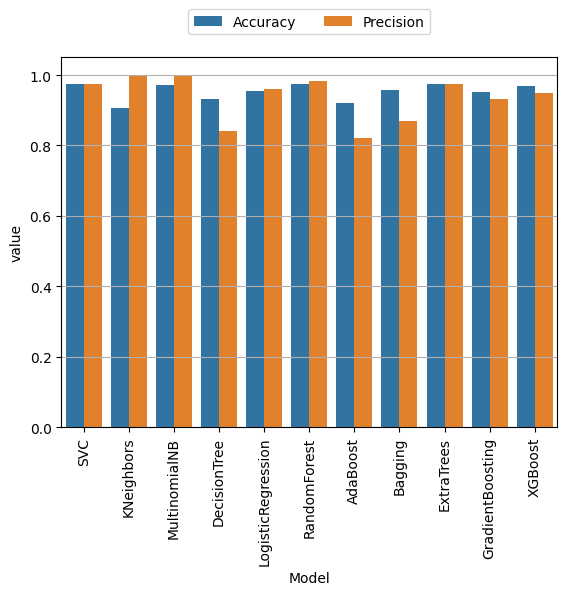

In [91]:
plt.figure()
sns.barplot(data = Models_df3,x = 'Model', y = 'value', hue='variable')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

After analysing various models and also trying voting and stacking ensemble techniques, MultinomialNB outpreforms everyone. Therefore, choosing it as my final model for SMS/Email Spam Prediction Model.  

In [100]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('esc-model.pkl','wb'))